In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
train.columns
train.shape[1]
trainf = (train - train.mean())/train.std()

In [6]:
y = trainf[['SalePrice']].copy()
x = trainf[ ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']].copy()


In [7]:
x['intercept']  = 1
x = x[ ['intercept','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]


In [8]:
def model(x,y,learning_rate, epochs):
  m = y.size
  msearray = []
  theta = np.zeros((x.shape[1], 1))
  for i in range(epochs):
    y_pred = np.dot(x,theta)
    mse = (1/(2*m)) * np.sum(( y - y_pred)**2)
    msearray.append(mse)
    d_theta = (1/m)*np.dot(x.T,y_pred-y)
    theta = theta - learning_rate*d_theta

  return theta,msearray


In [10]:
epochs = 10000
learning_rate = 0.001
theta , msearray = model(x,y,learning_rate = learning_rate, epochs = epochs)


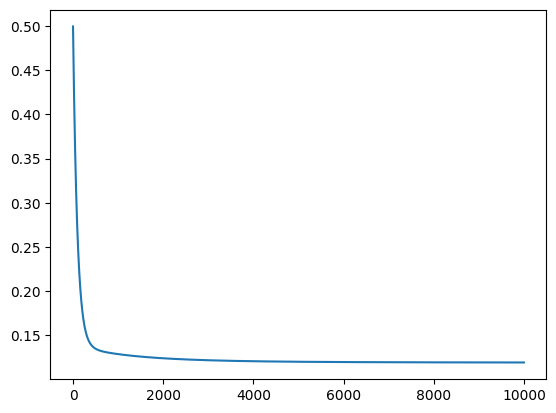

In [11]:
rng = np.arange(0,epochs)
plt.plot(rng, msearray)
plt.show()

In [12]:
test1 = pd.read_csv('test.csv')
test = (test1- test1.mean())/test1.std()
y_test = test[['SalePrice']].copy()
x_test = test[ ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']].copy()
x_test['intercept']  = 1
x_test = x_test[ ['intercept','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

In [13]:
y_pred = np.dot(x_test, theta)
error = (1/x_test.shape[0])*np.sum(np.abs(y_pred - y_test))

In [14]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : SalePrice    29.859792
dtype: float64 %
Test Accuracy is : SalePrice    70.140208
dtype: float64 %
